<a href="https://colab.research.google.com/github/shubham-20120/ML-Algorithms-Implementations/blob/main/Linear%20Regression%20from%20Scratch/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Data Manipulation

In [ ]:
import pandas as pd #to read csv
import numpy as np #to convert pandas DataFrame to numpy array
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/train.csv')
testData = pd.read_csv('/content/sample_data/test.csv')

In [ ]:
data.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [ ]:
print(data.shape)
print(testData.shape)

(700, 2)
(300, 2)


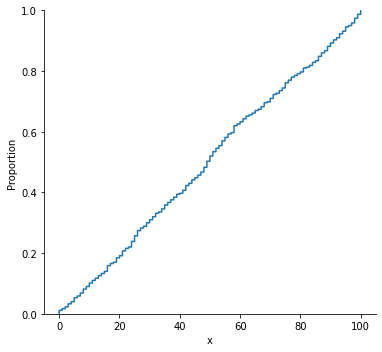

In [ ]:
# Empirical cumulative distributions
figA = sns.displot(data, x="x", kind="ecdf")
figA.fig.set_figwidth(5.5)
figA.fig.set_figheight(5)

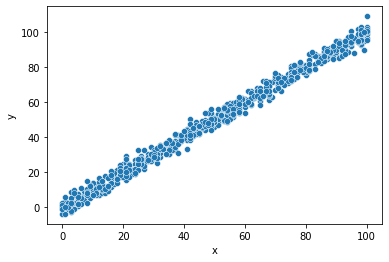

In [ ]:
fig_B = sns.scatterplot(data=data, x="x", y="y")

## Formula


---

---




m = (&nbsp;(x * y).mean()&nbsp; - &nbsp; x.mean() * y.mean()&nbsp;) &nbsp;&nbsp;&nbsp; /<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(&nbsp;(x*x).mean() &nbsp;- &nbsp;x.mean() &nbsp;*&nbsp; x.mean()&nbsp;)


---

c = y.mean() &nbsp; - &nbsp; m * x.mean()

In [ ]:
x = data.iloc[:,0]
y = data.iloc[:,1]

In [ ]:
def calcMC():
    xyMean = x*y
    xyMean = xyMean.mean()

    xMean = x.mean()

    yMean = y.mean()

    xxMean = x*x
    xxMean = xxMean.mean()
    m = (xyMean - xMean*yMean) / (xxMean - xMean*xMean)
    c = (yMean - m*xMean)
    return m,c

In [ ]:
m, c = calcMC()
print(m, c)

1.0007782480808511 -0.12015553181343819


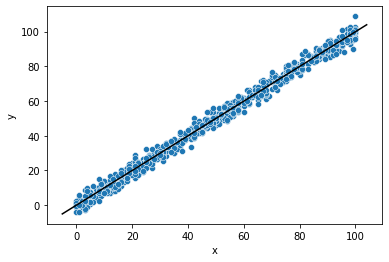

In [ ]:
xRange = np.arange(-5, 105)
yRange = m*xRange + c

fig_B = sns.scatterplot(data=data, x="x", y="y")
plt.plot(xRange, yRange, c='black')

##Testing





In [ ]:
xTest = testData.iloc[:,0]
yTest = testData.iloc[:,1]

In [ ]:
def predictY(x):
    y=[]
    for i in range(x.size):
        y.append(m*x[i] + c)
    
    return y

In [ ]:
def accuracy(yPred, yTest):
    actMean = (yTest - yPred)**2
    actSum = actMean.sum()
    yTestMean = yTest.mean()
    mnMean = y - yTestMean
    mnMean = mnMean**2
    meanSum = mnMean.sum()
    div = actSum/meanSum
    final = 1 - div
    return final*100;

In [ ]:
yPred = predictY(xTest)
yPred = pd.DataFrame(yPred)

In [ ]:
accuracyScore = accuracy(yPred.iloc[:,0], yTest)
print('accuracy : ', accuracyScore, '%')

accuracy :  99.5226965786654 %


### Test Graph

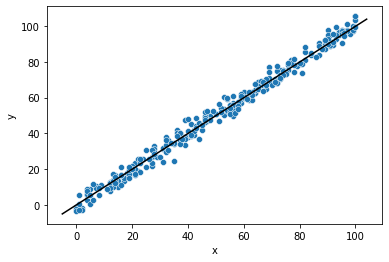

In [ ]:
xTestRange = np.arange(-5, 105)
yTestRange = m*xRange + c

fig_B = sns.scatterplot(data=testData, x="x", y="y")
plt.plot(xTestRange, yTestRange, c='black')